# Requesting cutouts of AIA images from the JSOC

This example shows how to request a cutout of a series of AIA images from the JSOC.

In [4]:
import os

import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

As this is an example, we have already worked out where we need to crop for the active region we want to showcase.

In [2]:
start_time = Time('2012-09-24T14:56:03', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

Now construct the cutout from the coordinates above above using the Cutout attribute.

In [5]:
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

Exporting data from the JSOC requires registering your email first. Please replace this with your email address once you have registered like so: jsoc_email = “your_email@example.com” See this page for more details.

In [10]:
jsoc_email = a.jsoc.Notify("pjgonzalezp@unal.edu.co")

Now we are ready to construct the query. Note that all of this is the same for a full-frame image except for the cutout component. We will download images from a 12 hour interval centered on the time of the above cutout. We request one image every 2 hours.

In [11]:
query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    jsoc_email,
    a.jsoc.Segment.image,
    cutout,
)
print(query)

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2012-09-24T08:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T10:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T12:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T14:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T16:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T18:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T20:56:01Z  SDO/AIA    AIA_3      171    2128




Now we are ready to construct the query. Note that all of this is the same for a full-frame image except for the cutout component. We will download images from a 12 hour interval centered on the time of the above cutout. We request one image every 2 hours.

In [13]:
query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    jsoc_email,
    a.jsoc.Segment.image,
    cutout,
)
print(query)

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2012-09-24T08:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T10:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T12:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T14:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T16:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T18:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T20:56:01Z  SDO/AIA    AIA_3      171    2128




Submit the export request and download the data.

In [14]:
files = Fido.fetch(query)
files.sort()

Export request pending. [id=JSOC_20240527_000486, status=2]
Waiting for 0 seconds...
7 URLs found for download. Full request totalling 7MB


Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

aia.lev1_euv_12s.2012-09-24T085601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T105601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T125601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T145601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T165601Z.171.image.fits:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T185601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T205601Z.171.image.fits:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

Now that we’ve downloaded the files, we can create a MapSequence from them and animate them.

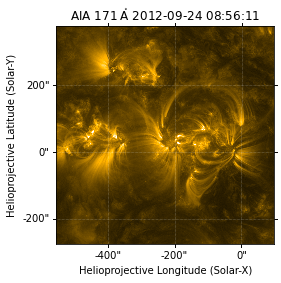

In [15]:
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

plt.show()